In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import minimize

sns.set(context="talk")

In [2]:
df = pd.read_csv("ex1data2.txt", names=['Size', 'Bedrooms', 'Price'])
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


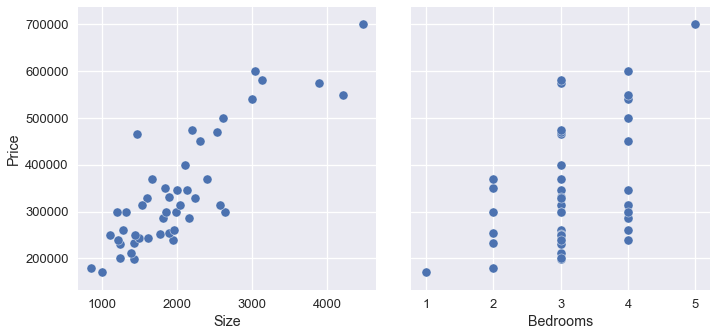

In [3]:
sns.pairplot(df,
             x_vars=["Size", "Bedrooms"],
             y_vars=["Price"],
             size=5, # Height in inch
             aspect=1)  # Ratio of width to height)
plt.show()

**Define hypothesis and cost function**

In [4]:
# Linear regression function
def hypo(theta, X):
    h = X.dot(theta)
    return h.reshape((-1, 1))

# Cost function
def costFun(theta, X, y):
    m = len(y)
    h = hypo(theta, X)
    return 1/(2*m) * np.sum((h-y)**2)

# Gradient function
def gradient(theta, X, y):
    m = len(y)
    h = hypo(theta, X)
    gradient = 1/m * (h - y).T.dot(X)
    return gradient.ravel()

X = df.values[:, 0:len(df.columns)-1]
y = df.values[:, len(df.columns)-1:len(df.columns)]
X = np.concatenate((np.ones([len(y), 1]), X), axis=1)
theta = np.zeros([len(df.columns)])

**Minimize cost function and find learned parameters theta**

In [5]:
res = minimize(costFun, theta, args=(X, y), jac=gradient)
print(res)

      fun: 2043280050.602828
 hess_inv: array([[  1.87835619e+01,  -3.46054428e-04,  -5.39130107e+00],
       [ -3.46054428e-04,   2.35683600e-06,  -1.37820588e-03],
       [ -5.39130107e+00,  -1.37820588e-03,   2.57040662e+00]])
      jac: array([  1.77955062e-07,   3.85933734e-04,   5.88995890e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 18
      nit: 10
     njev: 17
   status: 2
  success: False
        x: array([ 89597.90954283,    139.21067402,  -8738.01911231])


**Predict values**

In [6]:
# Predicted price of a 1650 sq-ft, 3 br house
x_predict = np.array([1, 1650, 3])
y_predict = hypo(res.x, x_predict).ravel()[0]
print("For a 1650 sq-ft, 3 br house, we predict a price of", y_predict)

For a 1650 sq-ft, 3 br house, we predict a price of 293081.464335
